In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Content
    1.Clustering Introduction
    2.EDA
    3.Dimensionality reduction for visualization
    4.Standardization
    5.Clustering Techniques

# **1. Clustering Introduction**
Clustering is an unsupervised Machine Learning method that is used to learn structure in a set of data points. There are no labels that can be used to train the model. Clustering tries to provide an answer to question "How to  make sense of data". Clustering is performed  on a set of N numbers of point present in a n-dimensonal hypercube. 

Distance between points indicates how similar points are. Below two points are the **Objectives** of clustering
1. Between points in different clusters ditances should be large.
2. Between points in same cluster distances should be small.

Points in the same group are very similar and points in different groups are very different

Two types of unsupervised machine learning

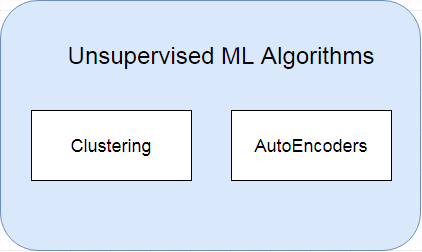

Two types of clustering 
1. Density Based
    1. KMeans
    2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
    3. Mean Shift
    4. GMM (Gaussian Mixture Models)
2. Hierarchical Based
    1. Top-down
    2. Bottom-up
    
    
Reference:

I have added reference to indiviual sections. 


In [ ]:
df_wine = pd.read_csv('../input/Wine.csv')


**EDA - exploratory data analysis**
1. Descriptive Statistics
    1. Pandas Describe Func
2. Correlation

In [ ]:
df_wine.describe()

In [ ]:
df_wine.head(5)

In [ ]:
df_wine.info()

In [ ]:
df_wine['Customer_Segment'].unique()

In [ ]:
# seperate the label and featuers
X = df_wine.drop('Customer_Segment', axis=1)
y = df_wine['Customer_Segment']

In [ ]:
wine_correlation = X.corr()
plt.figure(figsize=(25,25))
sns.heatmap(wine_correlation, annot=True, cmap ="RdBu_r");

In [ ]:
# Based on heat map Flavanoids is linearly related to Total_Phenols
sns.scatterplot(x='Flavanoids', y='Total_Phenols', data=df_wine);

In [ ]:
# Based on heat map Flavanoids is linearly related to OD280
sns.scatterplot(x='Flavanoids', y='OD280', data=df_wine);

# **3.Dimensionality reduction for Data Visualization**

1. Principal component analysis (PCA)
2. Isometric Mapping
3. t-Distributed Stochastic Neighbor Embedding (t-SNE)

Below is a 8 part collection on Dimensionality Reduction

[https://blog.paperspace.com/tag/series/](http://)

**3.1 PCA - Principal Component Analysis**

1. Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. 
2. Most basic and simplest dimensionality reduction
3. Visualizaing high n-dimensaonality data by reducing to 2/3-dimensaion.
4. Using PCA to reduce n-dimensional data into 2 dimension, so that data can be better understood.
5. PCA tries to preserve the global shape/structure of data

In [ ]:
pca_wine = PCA(n_components=2)

principalComp_wine = pca_wine.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca_wine.explained_variance_ratio_))

In [ ]:
principal_wine_Df = pd.DataFrame(data = principalComp_wine, columns = ['principal component 1', 'principal component 2'])
principal_wine_Df.head(5)

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(principal_wine_Df['principal component 1'],principal_wine_Df['principal component 2'], c=y);

**3.2. Isometric Mapping**

Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension.
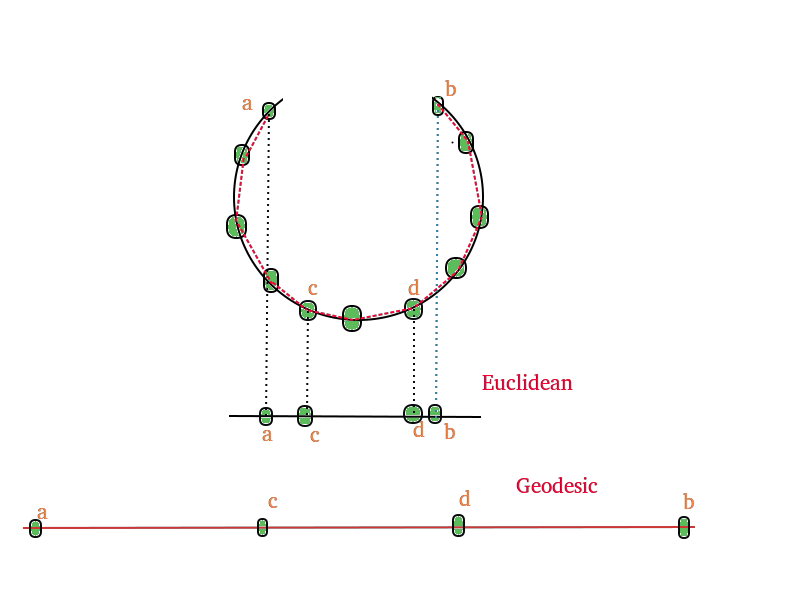
Reference: https://blog.paperspace.com/dimension-reduction-with-isomap/

In [ ]:
embedding = Isomap(n_components=2,n_neighbors=40)
X_isomap = embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y);

** 3.3 t-Distributed Stochastic Neighbor Embedding (t-SNE) **

1. t-SNE is capable of capturing much of the local structure of the high-dimensional
data very well, while also revealing global structure such as the presence of clusters at several scales.
2. t-SNE preserve the local strucutre

Reference: https://www.youtube.com/watch?v=FQmCzpKWD48

In [ ]:
tsneModel = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_wine_data =  tsneModel.fit_transform(X)

tsne_wine_data = np.vstack((tsne_wine_data.T, y)).T

tsne_wine_df = pd.DataFrame(data=tsne_wine_data, columns=('Dim_1', 'Dime_2', 'label'))

sns.FacetGrid(tsne_wine_df, hue='label', size=6).map(plt.scatter,  'Dim_1', 'Dime_2')
plt.show();

# 4. Standardization
Normalization typically means rescales the values into a range of [0,1]. 
Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

In [ ]:
X.head()

In [ ]:
from sklearn import preprocessing

 **Min-Max Scaler**

The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

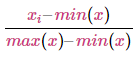

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

Reference: http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [ ]:
minmaxScaler = preprocessing.MinMaxScaler()
X_scaled_df = minmaxScaler.fit_transform(X)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled_df, columns=X.columns)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X['Alcohol'], ax=ax1)
sns.kdeplot(X['Magnesium'], ax=ax1)
sns.kdeplot(X['Proline'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_scaled_df['Alcohol'], ax=ax2)
sns.kdeplot(X_scaled_df['Magnesium'], ax=ax2)
sns.kdeplot(X_scaled_df['Proline'], ax=ax2)

plt.show();

# **5. Clustering Techniques**



## **5.1 K-means**
Is an example of *centroid* based algorithm, where every cluster can be  represnted by a centroid or reference vector.
K-means clustering is top-down approach, in the sense, we decide the number of clusters (k) and then group the data points into k clusters. k-means is limited to linear cluster boundaries.

Below are the two methods to pick the right value of 'K'. Meaning the right number of clusters.
1. Silhouette Method
2. Elbow Method

*Note:*
The elbow method doesn't always work well, if the data is not clustered  well. If the line plot doesn't plot an 'arm' like plot, and instead the plot is fairly smooth curve. Then it's unclear what is the best value of k to  choose. In this case try out 'Silhouette Method' or reevaluate whether clustering is the right thing

<img src="https://drrahilasheikh.files.wordpress.com/2017/12/92d25-1krczk0xygta4qfrvr0fo2w.gif">

*Reference:*

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://drrahilasheikh.wordpress.com/2017/12/22/featured-content/comment-page-1/

In [ ]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
X_scaled_df.shape

In [ ]:
X_scaled_df.describe()

### **5.1.1 Silhouette Method**
1. What is Silhouette Score

This doesn't need labeled data thus gives a huge advantage. The Silhouette score is dervied  from Silhouette Coeff, where-in Silhouette Coeff is calculated from  each data point. 
The Silhouette Score  ranges from '-1' to '+1'. A score of '+1' indicates the  data point is well within the cluster. A score of '-1' indicates that the  data point is assigned to wrong cluster. A score of '0' indicates that the  data point is on or  near to  border  of cluster.
2. Math behind Silhouette Score

2.1 Calculate the Silhouette Coeff for  each data point
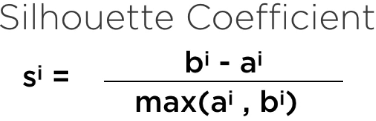

b(i) => Mean distance of point i from all the points in **next nearest** cluster

a(i) => Mean distance of point i from all the points in **same** cluster

2.2 Calculate the  Silhouette Score by averaging Silhouette Coeff of all data points


Reference:

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


In [ ]:
sScores = []
for n_clusters in range(2,30):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(X_scaled_df)
    clusters = kmeans.predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, clusters)
    sScores.append(silhouette_avg)

silhouette_df = pd.DataFrame({'No_Clusters':range(2,30), 'sScore':sScores})

In [ ]:
sns.set()
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='No_Clusters', y='sScore', data=silhouette_df);
ax.set(xticks=silhouette_df['No_Clusters']);
# from the plot below we can conclude that 3 is a good cluster number as Silhouette Score is the highest.

### **5.1.2 Elbow Method**
The Elbow Method is one of the most popular methods to determine this optimal value of k. The basic idea is to define clusters such that the total intra-cluster variation i.e. WSS (within-cluster sum of square) is minimized. The total WSS measures the compactness of the cluster. 

The desired number of clusters should be such that adding another cluster doesn't improve the WSS. If the line plot looks like an arm, then the "elbow" on the arm is the value of k that is the best cluster number.

In [ ]:
wss = []
for n_clusters in range(2,30):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(X_scaled_df)
    wss.append(kmeans.inertia_)
    

elbow_df = pd.DataFrame({'No_Clusters':range(2,30), 'sScore':wss})
    

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='No_Clusters', y='sScore', data=elbow_df);
ax.set(xticks=elbow_df['No_Clusters']);
# from the plot below we can conclude that 3 is a good cluster number as the  elbow is at 3.

### **5.1.3 Visualizing K-Means in 2D**
To visualize in 2D, we have to reduce the n-dimesion to 2D. For this let's use t-SNE dataframe we had generated in step 3.3.

One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster. This radius acts as a hard cutoff for cluster assignment within the training set: any point outside this circle is not considered a member of the cluster.


In [ ]:
# as per the elbow-method or Silhouette plot the number of clusters is => 3
kmeans_tsne_2d_df = tsne_wine_df.drop('label', axis=1)
kmeans_tsne = KMeans(n_clusters=3, random_state=0)
kmeans_tsne_labels = kmeans_tsne.fit_predict(kmeans_tsne_2d_df)
kmeans_tsne_centers = kmeans_tsne.cluster_centers_
kmeans_tsne_2d_df['label'] = kmeans_tsne_labels.tolist()

In [ ]:
kmeans_tsne_2d_df.head()

In [ ]:
from scipy.spatial.distance import cdist

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')
sns.scatterplot(x='Dim_1', y='Dime_2', hue='label', data=kmeans_tsne_2d_df, palette=['red','blue','green'], ax=ax)
plt.scatter(kmeans_tsne_centers[:,0], kmeans_tsne_centers[:, 1], s = 300, c = 'black' , label = 'centeroid', marker='*')
radii = [cdist(kmeans_tsne_2d_df[kmeans_tsne_labels == i].drop('label', axis=1), [center]).max() for i, center in enumerate(kmeans_tsne_centers)]
for c, r in zip(kmeans_tsne_centers, radii):
    ax.add_patch(plt.Circle(c, r, alpha=0.3))
        
plt.show();

## **5.2 Gaussian Mixture Models (GMMs)**

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. GMM has two parameters to describe the shape of the clusters i.e. Mean and Standard Deviation. Due to this the cluster can take any eliptical shape. GMM does soft assignments to each cluster as compared to hard assignments done by K-Means. Expectation–Maximization (EM) algorithm is used to fit clusters.

The hyperparameter (covariance_type), controls the degree of freedom in the shape of cluster. The default is covariance_type="diag", which means that the size of the cluster along each dimension can be set independently, with the resulting ellipse constrained to align with the axes.


Reference:

https://drrahilasheikh.wordpress.com/2017/12/22/featured-content/comment-page-1/

https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f

https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html


In [ ]:
from sklearn.mixture import GaussianMixture

gmm_tsne_2d_df = tsne_wine_df.drop('label', axis=1)

gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='full')
gmm_tsne_labels = gmm.fit(gmm_tsne_2d_df).predict(gmm_tsne_2d_df)
gmm_tsne_centers = gmm.means_
gmm_tsne_2d_df['label'] = gmm_tsne_labels.tolist()

In [ ]:
gmm_tsne_2d_df.head()

In [ ]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')
sns.scatterplot(x='Dim_1', y='Dime_2', hue='label', data=gmm_tsne_2d_df, palette=['red','blue','green'], ax=ax)

plt.scatter(gmm_tsne_centers[:,0], gmm_tsne_centers[:, 1], s = 300, c = 'black' , label = 'centeroid', marker='*')
ax.add_patch(Ellipse(gmm_tsne_centers[0], 2, 5.5, 150, alpha=0.3));
ax.add_patch(Ellipse(gmm_tsne_centers[1], 2, 6.6, 145, alpha=0.3));
ax.add_patch(Ellipse(gmm_tsne_centers[2], 2, 7, 145, alpha=0.3));

plt.show();